

# Project 1: Investigate a Dataset - Medical No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### About Dataset 

**Description**
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Dataset link: <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments">No-show Appointment Dataset</a>

**Data Dictionary**
<ol>
<li>PatientId: Identification of a patient</li>
<li>AppointmentID: Identification of each appointment</li>
<li>Gender: (Male or Female)</li>
<li>Scheduled Day: The day of the actuall appointment, when they have to visit the doctor.</li>
<li>Appointment Day: The day someone called or registered the appointment (before appointment).</li>
<li>Age: How old is the patient.</li>
<li>Neighbourhood: Where the appointment takes place.</li>
<li>8.Scholarship: (Yes or No)</li>
<li>Hipertension: (Yes or No)</li>
<li>Diabetes: (Yes or No)</li>
<li>Alcoholism: (Yes or No)</li>
<li>Handcap: (Yes or No)</li>
<li>SMS_received: (1 or more messages sent to the patient)</li>
<li>No-show: (True or False). - No(patient showed up for the appointment) and yes (patient didn"t show up)</li>
</ol>

### Question(s) for Analysis
<ol>
    <li>How many patients showed and didn't show up for appointments?</li>
    <li>What is the age distribution of patients?</li>
    <li>What is the relationship between age and showing up for appointments?</li>
    <li>What is the relationship between neigbourhood and showing up for appointments?</li>
    <li>What is the relationship between waiting time and showing up for appointments?</li>
    <li>What is the relationship between gender and showing up for appointments</li>
    <li>What is the relationship between sms recieved and showing up for appointments</li>
</ol>


In [1]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

**Import Packages for Dataset Analysis**

In [137]:
#Import Pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
plt.show()

<a id='wrangling'></a>
## Data Wrangling

> **In this section of the report, I will load in the data, check for cleanliness, trim and clean the dataset for analysis.**


In [138]:
# Load the dataset and print out a few rows.
df = pd.read_csv("medical_no_show.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [139]:
#print the number of rows and columns of the dataset
print(df.shape[0], "Rows X", df.shape[1], "Columns")

110527 Rows X 14 Columns


In [140]:
#Check the data types of each feature
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [141]:
#Check for duplicates rows
df.duplicated().sum()

0

In [142]:
#Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [143]:
#From the dataset, Age seems the only feature we can get the statistics summary
#check statistic summary of Age
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [144]:
#patient with negative age
df_ageneg = df[df["Age"] < 0]
df_ageneg.count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

In [145]:
#patient with zero age
df_age0 = df[df["Age"] == 0]
df_age0.count()

PatientId         3539
AppointmentID     3539
Gender            3539
ScheduledDay      3539
AppointmentDay    3539
Age               3539
Neighbourhood     3539
Scholarship       3539
Hipertension      3539
Diabetes          3539
Alcoholism        3539
Handcap           3539
SMS_received      3539
No-show           3539
dtype: int64

In [146]:
#patient with age greater than zero
df_nonezero = df[df["Age"] > 0]
df_nonezero.count()

PatientId         106987
AppointmentID     106987
Gender            106987
ScheduledDay      106987
AppointmentDay    106987
Age               106987
Neighbourhood     106987
Scholarship       106987
Hipertension      106987
Diabetes          106987
Alcoholism        106987
Handcap           106987
SMS_received      106987
No-show           106987
dtype: int64

### **Observation on the dataset**
>After checking the properties of the dataset. There are 110527 Rows and 14 Columns, there are no mising values, there are no duplicates rows. It was observed from the summary statistic of Age that the minimum age is a negative value. This is not normal and will be corrected when cleaning the data.


### Data Cleaning
>After investigating the properties of the datset. It is necesarry to perform some cleaning. It is observed that the feature age has 1 negative, 3539 zero values and 106987 non negative and non zero values. The values will be replaced with the mean values of the non-zero and non-negative values. The values of some features like  Gender, Scholarship, Hipertension, Diabetes, Alcoholism, sms_recieved will be changed. And some features that are not necessary to this analysis will be dropped. Also for proper analysis of this dataset, a new feature waiting_time will be created.
 

In [147]:
#Drop unnecessary features
df.drop(columns=["PatientId","AppointmentID"], inplace = True)

In [148]:
#Comfrirm if the two features have been dropped
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [149]:
#Mean of age of patients greater than zero
df_nonezero_mean = df_nonezero.iloc[:,5].mean()
df_nonezero_mean

38.31608513183845

In [150]:
#Set the age of patients equal to and less than zero to the mean age of patients greater than zero
df["Age"] = df["Age"].apply(lambda x: df_nonezero_mean if x <= 0 else x)

In [151]:
#Confirm the data type of feature Age
df["Age"].dtypes

dtype('float64')

In [152]:
#Convert the data type
df["Age"] = df["Age"].astype(int)

In [153]:
#Confirm if the conversion has been done
df["Age"].dtypes

dtype('int32')

In [154]:
#Confirm if the feature Age still has negative and zero values
df[df["Age"] <= 0].count()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [155]:
#Confirm if the feature Age still has negative and zero values
df["Age"].describe()

count    110527.000000
mean         38.305961
std          22.103575
min           1.000000
25%          20.000000
50%          38.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [156]:
#Change the values of some features for proper analysis
df['Gender'].replace(['F','M'], ['Female','Male'], inplace=True)
df['Scholarship'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['Alcoholism'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['SMS_received'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['Handcap'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['Hipertension'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['Diabetes'].replace([0, 1], ['No', 'Yes'], inplace=True)

In [157]:
#Confirm if changes to the features have been made
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In [158]:
#Convert the Appointment and Schedule day feature to date type
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).dt.date
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]).dt.date

In [159]:
#Comfirm if the Appointment and Schedule day type has been changed
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In [160]:
#Create a new feature "Waiting_day" of day type
df["Waiting_day"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days

In [161]:
#Comfirm if the new feature has been created
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_day
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,0
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,0
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No,0
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,0
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,0


In [162]:
#Summary statistic of Waiting_day feature
df["Waiting_day"].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_day, dtype: float64

In [163]:
#Drop the negative value in the Waiting_day feature
df.drop(df[df["Waiting_day"] < 0].index, inplace = True)

In [164]:
#Comfirm if the negative values have been dropped in the Waiting_day feature
df["Waiting_day"].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_day, dtype: float64

In [165]:
#Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index = False)

In [166]:
#Load the new saved data set to comfirmed if saved
df_cleaned = pd.read_csv("cleaned_dataset.csv")
df_cleaned

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_day
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,0
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,0
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No,0
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,0
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110517,Female,2016-05-03,2016-06-07,56,MARIA ORTIZ,No,No,No,No,No,Yes,No,35
110518,Female,2016-05-03,2016-06-07,51,MARIA ORTIZ,No,No,No,No,No,Yes,No,35
110519,Female,2016-04-27,2016-06-07,21,MARIA ORTIZ,No,No,No,No,No,Yes,No,41
110520,Female,2016-04-27,2016-06-07,38,MARIA ORTIZ,No,No,No,No,No,Yes,No,41


<a id='eda'></a>
## Exploratory Data Analysis

> This section is focus on addressing the research questions.

### Research Question 1: How many patients didn't show up for appointment?

In [167]:
#Counts of patients that didn't show up for appoitment
df["No-show"].value_counts()

No     88208
Yes    22314
Name: No-show, dtype: int64

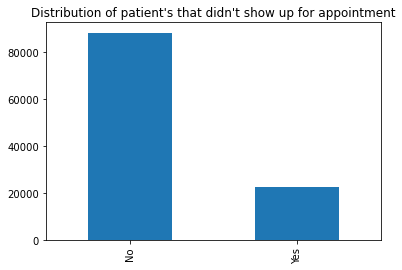

In [168]:
#Graph diribution of patients that didn;t show up for appoitment
df['No-show'].value_counts().plot(kind='bar', title='Distribution of patient\'s that didn\'t show up for appointment');

**Observation**
>The bar chart above shows that more patients showed up for their appotment. Total of **88208**  patients showed up for appoitment while total of **22314** patient didnt show of for appoitment.

### Research Question 2: What is the age distrubtion of patients?

In [169]:
df["Age"].value_counts()

38     5168
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

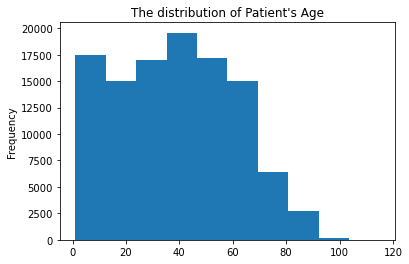

In [170]:
#Distribution of patients age
df["Age"].plot(kind = "hist", title = 'The distribution of Patient\'s Age');

### Research Question 3: What is the relationship between age and  showing up for appointment?

**Observation**
> The feature age and no-show are of different variable types. The age feature is a quantitative variable and the no-show feature is categorical variable type. For easier anaylsis, a new feature "Age_group" will be created. Patients age wil be categorised into the following:
<lo>
    <li>0-14 Children</li>
    <li>15-24 Youth</li>
    <li>25-64 Adult</li>
    <li>65 and Above Senior</li>
</lo>

In [171]:
#Create a new feature called "Age_group"
df["Age_group"] = df["Age"].apply(lambda x: "Children" if x <= 14 else "Youth" if x <=24 else "Adult" if x <=64 else "Senior" )

In [228]:
#Comfirm if the new feature has been created
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_day,Age_group
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,0,Adult
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,0,Adult
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No,0,Adult
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,0,Children
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,0,Adult


<AxesSubplot:>

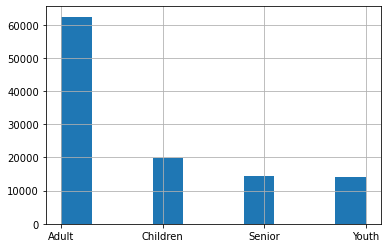

In [229]:
#Plot the distribution of Age_group
df["Age_group"].hist()

**Observation**
> The chart above show that most of the patients are adult that are 65 years and older.

**Discussion**
>To find the relationship between the age group and no-show features, the Pearson’s Chi-Square statistical hypothesis will be used. It is used to test for independence between categorical variables.  A crosstab called contingency table will be used to summarize the relationship between the two categorical variables.
><lo>
><li>Null hypothesis (H0): This means there is no statistically significant relationship between the two categorical >variables</li>
><li>Alternative hypothesis (Ha): This means there is a statistically significant relationship between the two categorical >variables</li>
><li>Decision Rule: Reject null hypothesis (H0), if p-value (0.05) < α. Otherwise, do not reject H0 </li>
></lo>



In [174]:
#Function to create a contigency table between the datset features and No-show
def chisqr(df,var):
    return pd.crosstab(df[var], df["No-show"], margins = False)

In [211]:
#Function to create bar chart for the contigency table between the datset features and No-show
def barplot(df, var):
    (pd.crosstab(df[var], df["No-show"], margins = False)).plot(kind = "bar", figsize = (20,5))
    plt.ylabel("No-show Appointment")
    plt.title(f"Distribution of {var} VS No-show".title(), fontsize = 15, weight='bold')

In [212]:
#Create a function to run a chi-square test for independence
def chitest(df, var):
    pd.crosstab(df[var], df["No-show"], margins = False)
    print ('p-value:', chi2_contingency( pd.crosstab(df[var], df["No-show"], margins = False))[1].round(5))

In [213]:
#Create a contigency table between Age_group and No-show
chisqr(df, "Age_group")

No-show,No,Yes
Age_group,,
Adult,50138,12258
Children,15431,4286
Senior,12169,2232
Youth,10470,3538


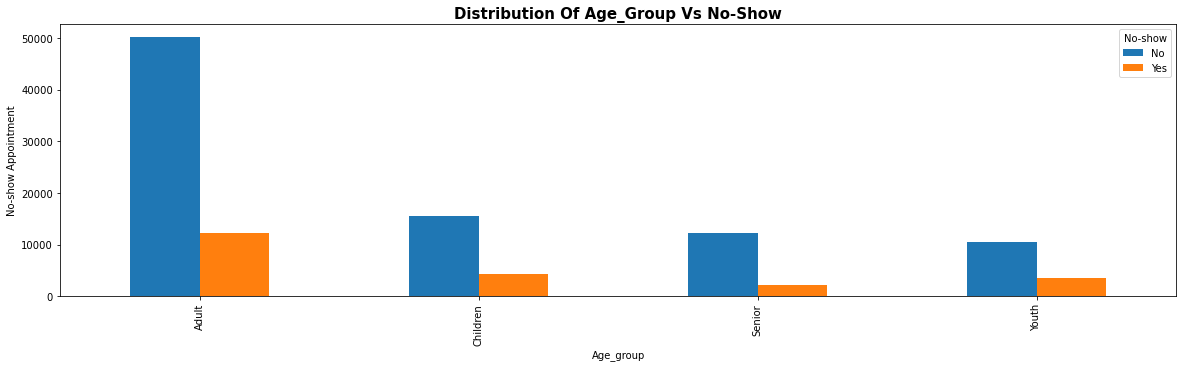

In [214]:
#Distribution of Age_group VS No-show featutes
barplot(df, "Age_group")

In [215]:
#Run a chi-square test for independence
chitest(df, "Age_group")

p-value: 0.0


**Discussion and Conclussion**
>Since p-value (0.0) is less than α=0.05 , we reject H0. There is a significant relationship betwwen the age group and showing up for appointment.

### Research Question 4: What is the relationship between neighbourhood and showing up for appointments?

>To find the relationship between neighbourhood and no-show features, the Pearson’s Chi-Square statistical hypothesis will be used. It is used to test for independence between categorical variables.  A crosstab called contingency table will be used to summarize the relationship between the two categorical variables.
><lo>
><li>Null hypothesis (H0): This means there is no statistically significant relationship between the two categorical >variables</li>
><li>Alternative hypothesis (Ha): This means there is a statistically significant relationship between the two categorical >variables</li>
><li>Decision Rule: Reject null hypothesis (H0), if p-value (0.05) < α. Otherwise, do not reject H0 </li>
></lo>

In [216]:
#Create a contigency table between Neighbourhood and No-show
chisqr(df,"Neighbourhood")

No-show,No,Yes
Neighbourhood,,
AEROPORTO,7,1
ANDORINHAS,1741,521
ANTÔNIO HONÓRIO,221,50
ARIOVALDO FAVALESSA,220,62
BARRO VERMELHO,332,91
...,...,...
SÃO JOSÉ,1549,428
SÃO PEDRO,1933,515
TABUAZEIRO,2559,572


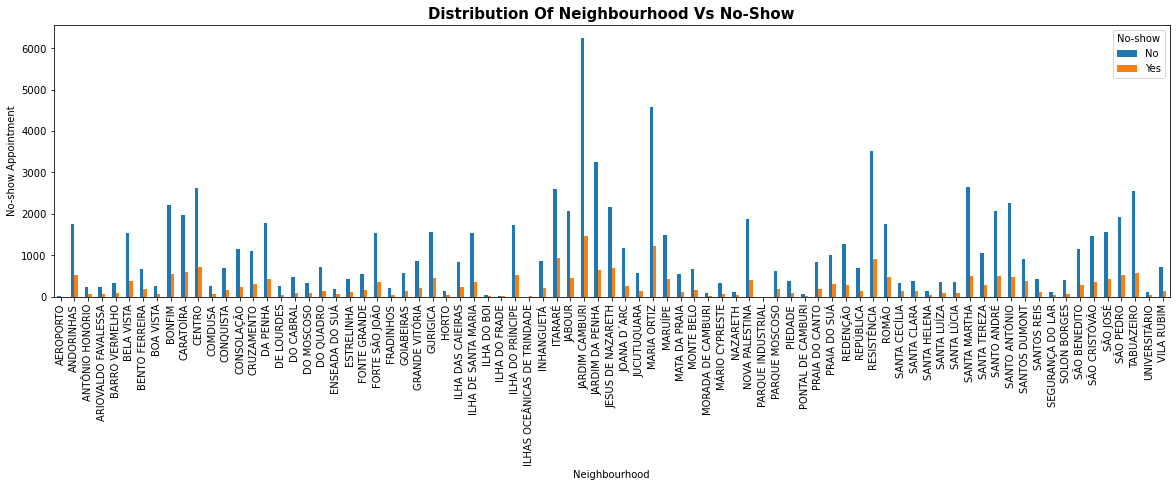

In [217]:
#Distribution of Neighbourhood VS No-show featutes
barplot(df,"Neighbourhood")

In [218]:
#Run a chi-square test for independence
chitest(df,"Neighbourhood")

p-value: 0.0


**Discussion and Conclussion**
>Since p-value (0.0) is less than α=0.05 , we reject H0. There is a significant relationship betwwen neighbourhood and showing up for appointment.

### Research Question 5: What is the relationship between waiting time and showing up for appointments?

In [219]:
#Average waiting days before showing up for appoitment
df_avgwd = df.groupby("No-show")["Waiting_day"].mean().round()
df_avgwd

No-show
No      9.0
Yes    16.0
Name: Waiting_day, dtype: float64

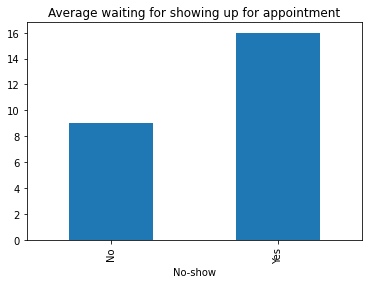

In [220]:
df_avgwd.plot(kind='bar', title='Average waiting for showing up for appointment');

**Discussion and Conclussion**
>The chart above shows that pateints with lesser waiting days show up for appoitments. This means that waiting days is a major factor that determines patients showing for appoitments.

### Research Question 6: What is the relationship between gender and showing up for appointments?

>To find the relationship between gender and no-show features, the Pearson’s Chi-Square statistical hypothesis will be used. It is used to test for independence between categorical variables.  A crosstab called contingency table will be used to summarize the relationship between the two categorical variables.
><lo>
><li>Null hypothesis (H0): This means there is no statistically significant relationship between the two categorical >variables</li>
><li>Alternative hypothesis (Ha): This means there is a statistically significant relationship between the two categorical >variables</li>
><li>Decision Rule: Reject null hypothesis (H0), if p-value (0.05) < α. Otherwise, do not reject H0 </li>
></lo>

In [221]:
#Create a contigency table between gender and No-show
chisqr(df,"Gender")

No-show,No,Yes
Gender,,
Female,57246,14591
Male,30962,7723


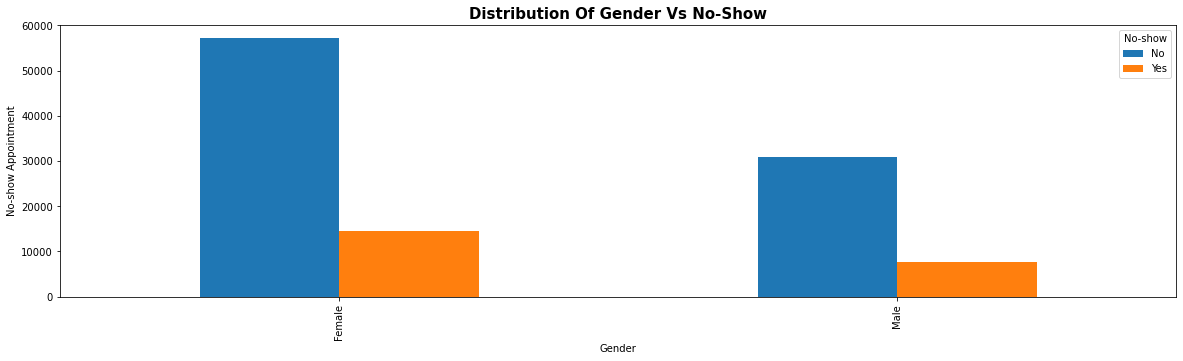

In [222]:
#Distribution of gender VS No-show featutes
barplot(df,"Gender")

In [223]:
#Run a chi-square test for independence
chitest(df,"Gender")

p-value: 0.17236


**Discussion and Conclussion**
>Since p-value (0.17236) is not less than α=0.05 , we do not reject H0. There is no significant relationship between gender and showing up for appointment.

### Research Question 7: What is the relationship between SMS recieved and showing up for appointments?

>To find the relationship between SMS recieved and no-show features, the Pearson’s Chi-Square statistical hypothesis will be used. It is used to test for independence between categorical variables.  A crosstab called contingency table will be used to summarize the relationship between the two categorical variables.
><lo>
><li>Null hypothesis (H0): This means there is no statistically significant relationship between the two categorical >variables</li>
><li>Alternative hypothesis (Ha): This means there is a statistically significant relationship between the two categorical >variables</li>
><li>Decision Rule: Reject null hypothesis (H0), if p-value (0.05) < α. Otherwise, do not reject H0 </li>
></lo>

In [224]:
#Create a contigency table between SMS recieved and No-show
chisqr(df,"SMS_received")

No-show,No,Yes
SMS_received,,
No,62510,12530
Yes,25698,9784


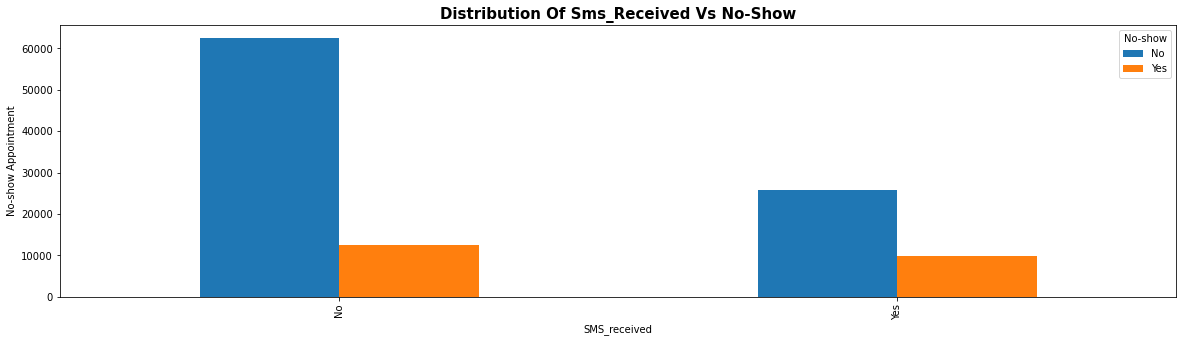

In [225]:
#Distribution of SMS recieved VS No-show featutes
barplot(df,"SMS_received")

In [226]:
#Run a chi-square test for independence
chitest(df,"SMS_received")

p-value: 0.0


**Discussion and Conclussion**
>Since p-value (0.0) is less than α=0.05 , we reject H0. There is a significant relationship betwwen SMS recieved and showing up for appointment.

<a id='conclusions'></a>
## Conclusions

>The analysis of the dataset "Medical No-show Appoitments" investiages some factors that influence whether patients will show up for appoitments or not. This analysis investiages the properties of features like Age_group, SMS_recieved, Gender, Waiting_day, Neighbourhood and their relationships with patients showing up for appointment. Analysis shows that features like age group,neighbourhood,waiting days and SMS recieved have significant relationship with patients showing for appoitments. Analysis to determine the relationship between some features and showing up for appointment was done using the chi square method. No other statistical method was used for this analysis. The investigation did not consider the features like Scholarship,	Hipertension, Diabetes, Alcoholism and Handcap on how they influence if patients show up for appoitments. In conclusion, there are only **Four (4)** features that influence if patients will show up for appointments or not.

>**Limitations**
<lo>
    <li>Most of the features in the dataset are categorical data type.</li>
    <li>Quantitative analysis and strong correleation could not be perform on the features since they are categorical data variable.</li>
    
>Below are the website that were used which aided the investigation of the dataset
<lo>
    <li><a href="https://www.pandas.pydata.org">pandas</a></li>
    <li><a href="https://www.matplotlib.org">matplotlib</a></li>
    <li><a href="https://www.seaborn.pydata.org">seaborn</a></li>


In [227]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295